### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

Ans:防止reward无限增大, 进入无限循环;𝛾取值范围是0-1之间。

2. Please breifly explain what is value function and what is Q function ?

Ans:V函数在某一状态不知道下一步具体动作, 知道概率分布, 描述了处于一个状态的长期最优化价值，即在这个状态下考虑到所有可能发生的后续动作，并且都挑选最优的动作来执行的情况下，这个状态的价值；
Q函数知道下一步动作, 描述了处于一个状态并执行某个动作后所带来的长期最优价值, 即在这个状态下执行某一特定动作后，考虑再之后所有可能处于的状态并且在这些状态下总是选取最优动作来执行所带来的长期价值。
某一个状态的价值可以用该状态下所有动作的价值表述。
某一个动作的价值可以用该状态后续状态的价值表达。

3. How temperal difference related to dynamic programming and monte-carlo methods ?

Ans:
dynamic programming: 需要知道所有状态概率分布, 动态规划的方法是利用模型对该期望进行计算。在没有模型时，我们可以采用蒙特卡罗的方法计算该期望，即利用随机样本来估计期望。在计算值函数时，蒙特卡罗方法是利用经验平均代替随机变量的期望

monte-carlo methods: 指在不清楚 MDP 状态转移概率的情况下，直接从经历完整的状态序列 (episode) 来估计状态的真实价值，并认为某状态的价值等于在多个状态序列中以该状态算得到的所有return 的平均。

蒙特卡罗法区别于 DP 方法主要在两方面。第一，蒙特卡罗法基于采样经验，所以没有模型也可以学习。第二，蒙特卡罗法不是 bootstrap 的。因为蒙特卡罗法不基于其他状态的值估计来更新值估计。

4. Please briefly describe what are value iteration and policy iteration ?

Ans:

value iteration:它并没有直接计算策略（Policy），而是在得到最优的基于策略的价值函数之后推导出最优的 Policy,迭代出optimal value function后只做一次policy update;

policy iteration:实质是在迭代策略评估之后加一个选择 Policy 的过程,不断迭代evaluation & improvement。

5. How can we use deep lerning in reinforcement learning ?

Ans:将深度学习神经网络与强化学习结合,利用神经网络拟合强化学习策略, 输入每个状态特征给神经网络, 拟合Q value

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [10]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

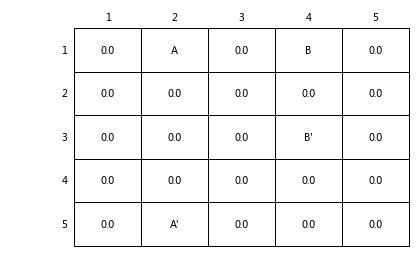

In [12]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

WORLD_SIZE = 5

A_POS = [0,1]
A_PRIME_POS = [4,1]
B_POS = [0,3]
B_PRIME_POS = [2,3]
DISCOUNT = 0.9

ACTIONS = [np.array([0,-1]),
           np.array([-1,0]),
           np.array([0,1]),
           np.array([1,0])]
ACTION_PROB = 0.25

def step(state,action):
    if state == A_POS:
        return A_PRIME_POS,10
    if state == B_POS:
        return B_PRIME_POS,5
    next_state = (np.array(state)+action).tolist()
    x,y = next_state
    if x < 0 or x >= WORLD_SIZE or \
            y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

In [2]:
def results():
    value= np.zeros((WORLD_SIZE,WORLD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i,next_J),reward = step([i,j],action)
                    new_value[i,j] += ACTION_PROB*(reward+DISCOUNT*value[next_i,next_J])

        if np.sum(np.abs(value-new_value)) < 1e-4:
            draw_image(np.round(new_value,decimals=2))
            plt.show()
            break
        value = new_value

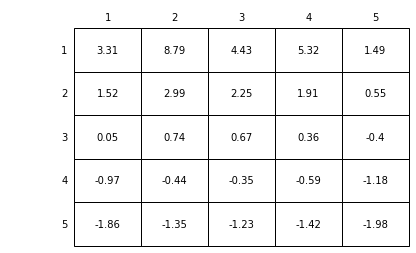

In [3]:
results()